In [47]:
import pandas as pd

#NLP
import regex as re
import nltk
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
from unidecode import unidecode
from collections import Counter

import sklearn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib as plt



'''
#Topic Modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from bertopic import BERTopic
'''
#Custom class
from sw import Sw
from tokenizer import Tokenizer 
from preprocessor import Preprocessor

In [17]:
exp_df = pd.read_csv("export-experiences-clean.csv", delimiter=';', encoding='iso-8859-1')

str_df=pd.read_csv("export-structures.csv",delimiter=';',encoding='utf-8')




C:\Users\theod\AppData\Local\Temp\ipykernel_11660\2228824631.py:1: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  exp_df = pd.read_csv("export-experiences-clean.csv", delimiter=';', encoding='iso-8859-1')


In [18]:
media_df=exp_df.loc[:,["Canaux Typologie 1","Description","Ressenti usager","Intitulé Typologie 1","Intitulé structure 1","ID structure 1"]]

In [19]:
merger_df=str_df.loc[:,['﻿"Code SP+ de la structure"',"Intitulé du réseau","Intitulé de la structure","Intitulé de la typologie"]]

In [20]:
join_df=pd.merge(merger_df,media_df,left_on='﻿"Code SP+ de la structure"',right_on="ID structure 1",how="inner")

In [21]:
join_df=join_df.dropna()
join_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18766 entries, 0 to 19918
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ﻿"Code SP+ de la structure"  18766 non-null  object
 1   Intitulé du réseau           18766 non-null  object
 2   Intitulé de la structure     18766 non-null  object
 3   Intitulé de la typologie     18766 non-null  object
 4   Canaux Typologie 1           18766 non-null  object
 5   Description                  18766 non-null  object
 6   Ressenti usager              18766 non-null  object
 7   Intitulé Typologie 1         18766 non-null  object
 8   Intitulé structure 1         18766 non-null  object
 9   ID structure 1               18766 non-null  object
dtypes: object(10)
memory usage: 1.6+ MB


In [29]:
join_df["accueil"]= join_df["Canaux Typologie 1"].str.contains("Accueil").astype(int)
remote_list=["Démarche en ligne","Compte"]
join_df["internet"]= join_df["Canaux Typologie 1"].str.contains("|".join(remote_list)).astype(int)
contact_list=["Téléphone"]
join_df["tel"]=join_df["Canaux Typologie 1"].str.contains("|".join(contact_list)).astype(int)

# Vérifier qu'il y ait un seul 1 entre les trois colonnes
def check_single_one(row):
    return row['tel'] + row['accueil'] + row['internet'] == 1

# Appliquer la vérification à chaque ligne
single_one_rows = join_df.apply(check_single_one, axis=1)

# Filtrer le DataFrame avec les lignes qui ont un seul 1 entre les trois colonnes
filtered_df = join_df[single_one_rows]


In [30]:
import numpy as np

filtered_df.loc[:,"mono_canal"] = np.select(
    [
        filtered_df["Canaux Typologie 1"].str.contains("Accueil"),
        filtered_df["Canaux Typologie 1"].str.contains("|".join(remote_list)),
        filtered_df["Canaux Typologie 1"].str.contains("|".join(contact_list))
    ],
    [
        "accueil",
        "internet",
        "tel"
    ],
    default=""
)

filtered_df["mono_canal"].value_counts()




C:\Users\theod\AppData\Local\Temp\ipykernel_11660\290374456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,"mono_canal"] = np.select(


mono_canal
internet    8228
accueil     1900
tel         1738
Name: count, dtype: int64

In [31]:
# Sélectionner 1000 lignes de chaque catégorie
sampled_df = filtered_df.groupby("mono_canal").head(1000).reset_index(drop=True)
X_prep=Preprocessor(sampled_df)
X_prep.text_processing("Description")

In [304]:
my_sw=Sw([])
my_sw.add_full_package()
my_sw.add_sw(["franc","apre","faut","part","lor","pourt","cec","voic","chang","mis","etrang","nom","dois","francais","habit"\
             "pourr","premier","bravo","egal","malheur","mauvais","period","mieux","mond","nombreux","sujet","ancien","prochain"\
             "voil","uniqu","aut","parent","niveau","prevu","loin"])
my_sw.add_sw(["absurd","combien","km","euros","puiss","trois","quatr","cinq","six"])

my_sw.add_sw(["inform","demarch","grand","souhait","certain","beaucoup","nouveau","erreur"])

my_sw.add_sw(["demand","servic","peu","moyen","etat","impot","consulat","nouvel","just","difficult","experient","pouvoir"])

my_sw.add_sw(["enfant","public","facil","pend","inadmissibl","effet","impress","manier","elle","petit","veux"])



my_sw.add_sw(["suff","honteux","quant","exact","rar","allez","recent","bientot","barcelon","inaccept","desesper","sinon"\
             "principal","mod","quas","devon","mien","ide","entier","inquiet","verit","avion","derrier","sur","sincer","foi"\
             "idem","faill","exceptionnel","eventuel","figur","besoin","covid","pouv","cas","rapid","encor","droit"])

my_sw.add_sw(["regulier","element","endroit","aim","contrair","pouvon","all","decu","foncier","efficac","necessair","ver"\
             "doit","ceux","longu","voitur","sen","epous","exist","conjoint","tourn","vain","sert","bel","allait","trimestr",\
             "veut","permanent","serieux","laquel","dizain","typ","haut","doubl","masqu","vaccin","caus","eme"\
             "util","vol","bref","bout","faudr","exempl","perdu","tax","ensuit","chacun","supplement","pandem","nant","saint"])

'''
my_sw.add_sw(["minuit","futur","par","hont","genr","inutil","voisin","limit","mal","clair","pourr","parf","dessus"\
             ,"option","perdr","reel","usag","ais","soi","econom","taux","paris","plein","bas","plutot","ensemb","evident"\
             ,"grac","cong","nombr"])
'''

'\nmy_sw.add_sw(["minuit","futur","par","hont","genr","inutil","voisin","limit","mal","clair","pourr","parf","dessus"             ,"option","perdr","reel","usag","ais","soi","econom","taux","paris","plein","bas","plutot","ensemb","evident"             ,"grac","cong","nombr"])\n'

In [305]:
token_X.token_df["desc_clean"]

0       appel rend offici polic port plaint ident cont...
1       commenc ver commenc environ jeun pass appel po...
2       valid procur presidentiel occup gentilless cou...
3       telephon portabl rendu commissariat posit tele...
4       ere essai vien constitu maprocur gouv indiqu i...
                              ...                        
2995    suiv resid suiv renouvel cart consulair numic ...
2996    concern precedent forc personnel possibl fourn...
2997        accord secur docu ressort vi concern secur vi
2998    mariag extrem consul general equip attend mari...
2999              rdv organis plac oblig sanitair continu
Name: desc_clean, Length: 3000, dtype: object

In [306]:
token_X=Tokenizer(sampled_df)

In [307]:
token_X.token_processing(stoplist=stopwords.words("french"),stop_list_stemming=my_sw.sw_list,verbose=True,nb_occurence=20)

jaja
################################################################
Counter({'telephon': 777, 'sit': 728, 'repons': 659, 'rend': 655, 'appel': 564, 'recu': 523, 'contact': 489, 'mail': 483, 'compt': 438, 'pass': 436, 'vot': 435, 'passeport': 409, 'trouv': 398, 'accueil': 394, 'docu': 386, 'impossibl': 385, 'cart': 381, 'aid': 372, 'internet': 368, 'lign': 366, 'problem': 355, 'administr': 352, 'renouvel': 340, 'don': 339, 'agent': 335, 'plaint': 329, 'retrait': 327, 'connect': 309, 'procur': 306, 'numero': 302, 'adress': 291, 'rdv': 284, 'simpl': 284, 'obten': 279, 'attent': 278, 'commissariat': 276, 'pai': 270, 'expliqu': 269, 'mair': 269, 'gendarmer': 264, 'question': 256, 'del': 255, 'vi': 254, 'declar': 249, 'jam': 244, 'polic': 242, 'indiqu': 236, 'fin': 219, 'courri': 216, 'envoi': 215, 'personnel': 212, 'depos': 212, 'valid': 211, 'repond': 207, 'ident': 202, 'envoy': 201, 'conseil': 197, 'renseign': 195, 'concern': 190, 'travail': 187, 'aller': 185, 'dev': 184, 'perm': 184, '

,"﻿""Code SP+ de la structure""",Intitulé du réseau,Intitulé de la structure,Intitulé de la typologie,Canaux Typologie 1,Description,Ressenti usager,Intitulé Typologie 1,Intitulé structure 1,ID structure 1,...,internet,tel,desc,mono_canal,desc_token,desc_stop,desc_stem,desc_stem+,desc_stem++,desc_clean
0,r7qjlPvWjQ,POLICE NATIONALE,DDSP DES YVELINES,DIRECTION DEPARTEMENTALE DE LA SECURITE PUBLIQUE,Téléphone,J'appelle pour pouvoir prendre rendez-vous ave...,Négatif,COMMISSARIAT DE POLICE,DDSP DES YVELINES,r7qjlPvWjQ,...,0,1,appelle pour pouvoir prendre rendez vous avec ...,tel,"[appelle, pour, pouvoir, prendre, rendez, vous...","[appelle, pouvoir, prendre, rendez, officier, ...","[appel, pouvoir, prendr, rend, offici, polic, ...","[appel, pouvoir, prendr, rend, offici, polic, ...","[appel, rend, offici, polic, port, plaint, ide...",appel rend offici polic port plaint ident cont...
1,r7qjlPvWjQ,POLICE NATIONALE,DDSP DES YVELINES,DIRECTION DEPARTEMENTALE DE LA SECURITE PUBLIQUE,Téléphone,Le tapage nocturne commence vers 2h du matin m...,Négatif,COMMISSARIAT DE POLICE,DDSP DES YVELINES,r7qjlPvWjQ,...,0,1,tapage nocturne commence vers matin reveillant...,tel,"[tapage, nocturne, commence, vers, matin, reve...","[tapage, nocturne, commence, vers, matin, reve...","[tapag, nocturn, commenc, ver, matin, reveil, ...","[commenc, ver, matin, beaucoup, cel, commenc, ...","[commenc, ver, commenc, environ, jeun, pass, a...",commenc ver commenc environ jeun pass appel po...
2,xfNQlwWs27,POLICE NATIONALE,DDSP DU MAINE ET LOIRE,DIRECTION DEPARTEMENTALE DE LA SECURITE PUBLIQUE,Accueil,Nous sommes venus faire valider des procuratio...,Positif,COMMISSARIAT DE POLICE,DDSP DU MAINE ET LOIRE,xfNQlwWs27,...,0,0,nous sommes venus faire valider des procuratio...,accueil,"[nous, sommes, venus, faire, valider, des, pro...","[venus, faire, valider, procurations, presiden...","[venus, fair, valid, procur, presidentiel, bri...","[fair, valid, procur, presidentiel, occup, eta...","[valid, procur, presidentiel, occup, gentilles...",valid procur presidentiel occup gentilless cou...
3,uQNEAFp5JQ,POLICE NATIONALE,DDSP DU NORD,DIRECTION DEPARTEMENTALE DE LA SECURITE PUBLIQUE,Accueil,"Bonjour,\n\nSuite au vol de mon téléphone port...",Neutre,COMMISSARIAT DE POLICE,DDSP DU NORD,uQNEAFp5JQ,...,0,0,bonjour suite vol mon telephone portable samsu...,accueil,"[bonjour, suite, vol, mon, telephone, portable...","[bonjour, suite, vol, telephone, portable, sam...","[bonjour, suit, vol, telephon, portabl, samsun...","[bonjour, suit, vol, telephon, portabl, rendu,...","[telephon, portabl, rendu, commissariat, posit...",telephon portabl rendu commissariat posit reel...
4,uQNEAFp5JQ,POLICE NATIONALE,DDSP DU NORD,DIRECTION DEPARTEMENTALE DE LA SECURITE PUBLIQUE,Accueil,"Bonjour,\n\n1ere essai, je viens alors que j'a...",Négatif,COMMISSARIAT DE POLICE,DDSP DU NORD,uQNEAFp5JQ,...,0,0,bonjour ere essai viens alors que constitu dos...,accueil,"[bonjour, ere, essai, viens, alors, que, const...","[bonjour, ere, essai, viens, alors, constitu, ...","[bonjour, ere, essai, vien, alor, constitu, do...","[bonjour, ere, essai, vien, alor, constitu, do...","[ere, essai, vien, constitu, maprocur, gouv, i...",ere essai vien constitu maprocur gouv indiqu i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,kOsox3nnIl,Ministère de l’Europe et des Affaires étrangèr...,Consulat Général de France à Marrakech,Réseau consulaire,Accueil,Pas de suivi des individus résidant autour de ...,Négatif,Réseau consulaire,Consulat Général de France à Marrakech,kOsox3nnIl,...,0,0,pas suivi des individus residant autour marrak...,accueil,"[pas, suivi, des, individus, residant, autour,...","[suivi, individus, residant, autour, marrakech...","[suiv, individus, resid, autour, marrakech, su...","[suiv, resid, suiv, renouvel, cart, consulair,...","[suiv, resid, suiv, renouvel, cart, consulair,...",suiv resid suiv renouvel cart consulair numic ...
2996,kOsox3nnIl,Ministère de l’

In [308]:
#token_X.token_df["desc_stem++"]

In [309]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [310]:
X=token_X.token_df["desc_stem++"]
y=sampled_df["mono_canal"]

model = Word2Vec(sentences=X)

word_vectors=model.wv

nombre_lignes_vides = token_X.token_df["desc_stem++"].isnull().sum()

# Affichez le nombre de lignes vides
print("Nombre de lignes vides :", nombre_lignes_vides)


Nombre de lignes vides : 0


In [311]:
# Transformer les lignes de texte en vecteurs en utilisant les vecteurs de mots
X_transformed = np.array([np.mean([word_vectors[word] for word in line if word in word_vectors], axis=0) for line in X])

# Diviser X_transformed et y en train set et test set
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

In [312]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


In [313]:
knn = KNeighborsClassifier(n_neighbors=60)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")


Précision du modèle : 0.6711111111111111


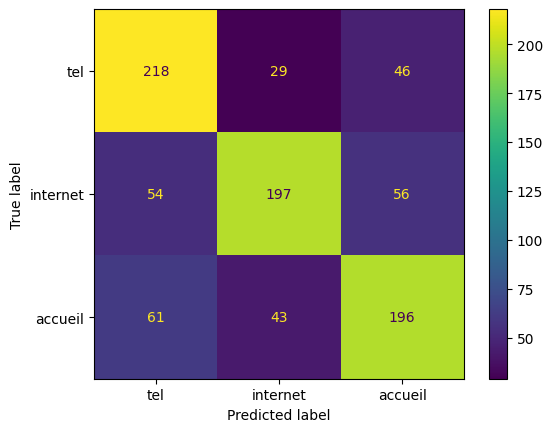

In [289]:
true_labels= y_test
predicted_labels=y_pred
labels=["tel","internet","accueil"]

results=confusion_matrix(true_labels,predicted_labels,labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=results,display_labels=labels)
disp.plot()

In [314]:
import joblib

In [315]:
joblib.dump(knn, 'knn_media_prediction_1.pkl')

['knn_media_prediction_1.pkl']